In [1]:
from __future__ import absolute_import
from __future__ import print_function
import six
__author__ = 'a_medelyan'

In [2]:
import RAKE as rake
import operator
import io
import os
import PyPDF2 
import textract

In [3]:
# 1. initialize RAKE by providing a path to a stopwords file
stoppath = 'C:/Users/USUARIO/Code/proymaestria/python/SmartStoplist.txt'
#rake_object = rake.Rake(stoppath, 5, 3, 4)
rake_object = rake.Rake(stoppath)

In [4]:
def sort_keyword(tup):
  tup.sort(reverse=True)
  return tup

In [70]:
path = "C:/Users/USUARIO/Code/proymaestria/python/documents/"
os.chdir(path)
#file_pdf = io.open(filename, 'r', encoding="iso-8859-1")
def read_text_file(file_path):
    with open(file_path, 'r') as f:
      pdfFileObj = open(file_path,'rb')             #Abrimos archivo de PDF
      pdfReader = PyPDF2.PdfFileReader(pdfFileObj)  #leemos el PDF
      num_pages = pdfReader.numPages                #contamos la paginas del PDF
      print(num_pages)
      count = 0
      text = ""
      #recorrer las paginas del PDF y extraer el texto
      while count < num_pages: 
        pageObj = pdfReader.getPage(count)
        count +=1
        text += pageObj.extractText()
        #text = text.encode("utf-8").decode('ascii', 'ignore')
        #text = str(text)
        text = str(text.encode('utf-8').decode('ascii', errors='ignore'))

      if text != "":
        text = text
      else:
        text = textract.process(fileurl, method='tesseract', language= "eng")  # extraemos unicamente el TEXTO en idioma INGLES
      return text
#leemos todos los PDF que estan en una carpeta
for file in os.listdir():
    print(file)
    if file.endswith(".pdf"):
        file_path = f"{path}{file}"
        print("_______________________________\n archivo: ",file_path)
        text=read_text_file(file_path)
        #print(text)
        keywords = sort_keyword(rake_object.run(text))
        result = keywords[0:15]
        print("keywords=======>\n",result)

effect.pdf
_______________________________
 archivo:  C:/Users/USUARIO/Code/proymaestria/python/documents/effect.pdf
7
keywords=======>
 [('young child', 3.166666666666667), ('years exclusively', 3.2), ('years', 1.2), ('working functions', 4.0), ('work \noffers equating', 7.875), ('work', 1.875), ('words', 1.0), ('wil', 1.0), ('wein [\n13\n]', 1.0), ('weights', 1.0), ('wait', 1.0), ('vital', 1.0), ('visible phase', 3.5384615384615383), ('virtual educationiop conf', 7.909090909090909), ('verified', 1.0)]
ElTrasfondoDeLaPlaneacion.pdf
_______________________________
 archivo:  C:/Users/USUARIO/Code/proymaestria/python/documents/ElTrasfondoDeLaPlaneacion.pdf
16
keywords=======>
 [('xxx', 1.0), ('xifra', 1.0), ('ww', 1.0), ('wait', 1.0), ('visin institucional', 6.0), ('violencia', 3.0), ('verificar', 1.0), ('verdaderamente libre', 4.0), ('ver con los objetivos', 14.488045738045738), ('venegas', 1.0), ('vale decir', 4.4), ('utility', 1.0), ('usefulness', 1.0), ('uno de los retos', 15.165476

keywords=======>
 [('years', 1.0), ('written \ninformed consent form', 13.25), ('world', 1.0), ('work activities', 5.0), ('women', 1.3333333333333333), ('widely \ninformed', 5.0), ('weight scale \nfloor device', 10.916666666666666), ('weight loss', 5.083333333333334), ('weight', 2.75), ('weekly', 1.0), ('week 0', 1.5), ('walking briskly', 4.0), ('volume', 2.0), ('volleyball', 1.0), ('vldl', 1.0)]
securityart.pdf
_______________________________
 archivo:  C:/Users/USUARIO/Code/proymaestria/python/documents/securityart.pdf
6
keywords=======>
 [('zed attack \n\nproxy \nproject', 14.875), ('xss', 1.0), ('wrong security settings', 7.0964912280701755), ('worst case', 3.5), ('worry', 1.0), ('worldwide', 1.0), ('works', 1.5), ('work', 1.4), ('wisconsin', 1.0), ('wherewith', 1.0), ('welcomed', 1.0), ('weights', 1.0), ('weightings \n\nassigned', 4.0), ('weighing', 1.0), ('web security', 4.631578947368421)]


In [71]:
list_of = dict((l,v) for l, v in result)
print (type(list_of))
print (list_of)

<class 'dict'>
{'zed attack \n\nproxy \nproject': 14.875, 'xss': 1.0, 'wrong security settings': 7.0964912280701755, 'worst case': 3.5, 'worry': 1.0, 'worldwide': 1.0, 'works': 1.5, 'work': 1.4, 'wisconsin': 1.0, 'wherewith': 1.0, 'welcomed': 1.0, 'weights': 1.0, 'weightings \n\nassigned': 4.0, 'weighing': 1.0, 'web security': 4.631578947368421}


In [72]:
values= list_of.values()
print (values)

keys= list_of.keys()
print(keys)

dict_values([14.875, 1.0, 7.0964912280701755, 3.5, 1.0, 1.0, 1.5, 1.4, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, 4.631578947368421])
dict_keys(['zed attack \n\nproxy \nproject', 'xss', 'wrong security settings', 'worst case', 'worry', 'worldwide', 'works', 'work', 'wisconsin', 'wherewith', 'welcomed', 'weights', 'weightings \n\nassigned', 'weighing', 'web security'])


In [73]:
groupkeywords = list(zip(*[iter(keys)]*1))
groupkeywords = [list(x) for x in groupkeywords]

In [121]:

df = pd.DataFrame(groupkeywords, columns=['Palabra Clave'])
df['Palabra Clave'] = df['Palabra Clave'].str.replace(r'''["*/():\n]''', '', regex=True)
print(df)


               Palabra Clave
0   zed attack proxy project
1                        xss
2    wrong security settings
3                 worst case
4                      worry
5                  worldwide
6                      works
7                       work
8                  wisconsin
9                  wherewith
10                  welcomed
11                   weights
12       weightings assigned
13                  weighing
14              web security


In [74]:
import pandas as pd
import pytrends
from pytrends.request import TrendReq

In [75]:
## Se crea la conexion, se indica que el lenguaje es español de Mexico
pytrend = TrendReq(hl='es')
 
## Se construye el payload a enviar
pytrend.build_payload(kw_list=["programacion"], cat=0, timeframe='today 3-m', geo='es', gprop='')
 
## Envia el payload para obtener la serie temporal e imprime la informacion
print(pytrend.interest_over_time())




ResponseError: The request failed: Google returned a response with code 400.

In [76]:
dicti = {}
i = 1
for trending in groupkeywords:
        #pytrend.build_payload (trend, delay = & 39; today 3 m &  39;, geo = &  39; GB &  39)
        pytrend.build_payload(trending, timeframe = 'today 1-m', geo = 'ES')
        #pytrends.build_payload(trending, timeframe = 'today 3-m', geo = 'GB')
        dicti[i] = pytrend.interest_over_time ()
        i+=1

result = pd.concat(dicti, axis=1)
result.columns = result.columns.droplevel(0)
result = result.drop('isPartial', axis = 1)

result

,xss,worst case,worry,worldwide,works,work,wisconsin,welcomed,weights,weighing,web security
2022-05-12 00:00:00,25,0,55,28,60,76,25,0,17,0,0
2022-05-13 00:00:00,85,0,73,50,75,53,42,0,38,100,0
2022-05-14 00:00:00,0,0,58,28,64,73,62,0,21,0,0
2022-05-15 00:00:00,0,0,45,34,58,50,15,0,20,0,0
2022-05-16 00:00:00,0,0,28,40,58,77,63,0,51,0,0
2022-05-17 00:00:00,24,0,35,79,77,84,70,0,64,42,0
2022-05-18 00:00:00,72,94,35,32,78,82,12,0,16,42,48
2022-05-19 00:00:00,24,0,27,48,60,83,24,100,16,0,0
2022-05-20 00:00:00,24,0,70,42,60,82,47,49,16,42,0
2022-05-21 00:00:00,0,0,43,26,59,78,100,60,58,0,0


In [80]:
import numpy as np
import pandas as pd

([<matplotlib.patches.Wedge at 0x28aedb03820>,
 [Text(0.9109642100810752, 0.6165583572958546, ''),
  Text(-0.42095177560159874, 1.0162674857624154, ''),
  Text(-1.0905893452707216, -0.14357882846011377, ''),
  Text(-0.45695648023571767, -1.0005952104475537, ''),
  Text(0.7961074957571249, -0.7590868561629293, '')])

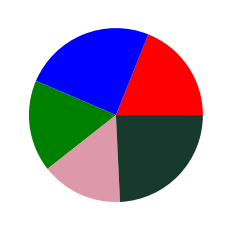

In [79]:
from matplotlib import pyplot 

lenguajes = ('python', 'C', 'java', 'Go', 'Javascript')
slices = (100,130,90,80,128)
colores = ('red','blue','green','#DD98AA', '#18392D')

pyplot.pie(slices, colors=colores)

In [81]:
result.sum()

xss              617
worst case       291
worry           1435
worldwide       1269
works           1917
work            2252
wisconsin       1567
welcomed         314
weights         1072
weighing         387
web security     468
dtype: int64

In [108]:
def readData(filename):
    df = pd.read_csv(filename,sep=';', low_memory=False)
    return df

filename = "C:/Users/USUARIO/Code/proymaestria/python/scimagojr2021r.csv"
df = readData(filename) 
df

,Rank,Sourceid,Title,Issn,SJR Best Quartile,H index,Total Docs. (2021),Country,Publisher,Coverage,Categories
0,1,21100886398,Profile: Issues in Teachers' Professional Deve...,"16570790, 22565760",Q1,6,31,Colombia,Universidad Nacional de Colombia,2018-2021,Linguistics and Language (Q1); Education (Q2)
1,2,19700188499,Suma Psicologica,"21459797, 01214381",Q3,13,16,Colombia,Konrad Lorenz Fundacion Universitaria,2010-2021,Psychology (miscellaneous) (Q3)
2,3,99288,Colombia Medica,"16579534, 01208322",Q3,20,38,Colombia,Facultad de Salud de la Universidad del Valle,"1946, 1990, 1996-2002, 2004-2021",Medicine (miscellaneous) (Q3)
3,4,21100407145,Investigacion y Educacion en Enfermeria,"22160280, 01205307",Q2,12,44,Colombia,Facultad de Enfermeria de la Universidad de An...,2014-2021,Community and Home Care (Q2); Maternity and Mi...
4,5,5600155211,Historia Critica,1211617,Q1,9,24,Colombia,Universidad de los Andes,2002-2021,Cultural Studies (Q1); History (Q1); Geography...
...,...,...,...,...,...,...,...,...,...,...,...
118,119,21100842562,Estudios de Literatura Colombiana,1234412,Q4,1,16,Colombia,Universidad de Antioquia,2017-2021,Arts and Humanities (miscellaneous) (Q4); Elec...
119,120,21100944295,"Literatura: Teoria, Historia, Critica","01235931, 22565450",Q4,1,39,Colombia,Universidad Nacional de Colombia,2019-2021,Literature and Literary Theory (Q4)
120,121,21101056930,Palabra,"23463864, 01218530",-,0,19,Colombia,Universidad Pedagogica y Tecnologica de Colomb...,2021,Literature and Literary Theory
121,122,21101048270,Revista Colombiana de Cirugia,"20117582, 26196107",-,1,83,Colombia,Asociacion Colombiana de Cirugia,2021,Surgery


In [109]:
result.sum()

xss              617
worst case       291
worry           1435
worldwide       1269
works           1917
work            2252
wisconsin       1567
welcomed         314
weights         1072
weighing         387
web security     468
dtype: int64